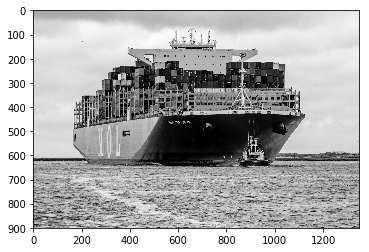

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open('900.jpeg', 'r').convert('L')
width, height = im.size
pixel_values_grey = list(im.getdata())

pixel_values_grey = np.array(pixel_values_grey).reshape((900, 1350))

plt.imshow(pixel_values_grey, cmap='gray')
plt.show()

In [4]:
#Dit is het bewijs dat de pixel walker niet werkt op Grayscale. De gemiddelde waarde op de boot is identiek 
#als de grijswaarde van het water.

print('boat : ', pixel_values_grey[500:600,220:250].mean())

print('air : ', pixel_values_grey[100:200,0:200].mean())

print('sea : ', pixel_values_grey[700:900,0:1300].mean())

boat :  164.62433333333334
air :  228.1723
sea :  164.62963461538462


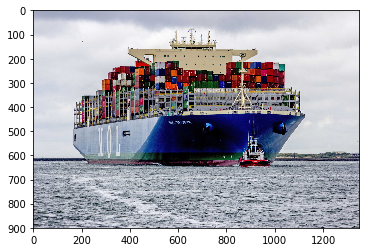

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im_color = Image.open('900.jpeg', 'r')
width, height = im_color.size
pixel_values_color = list(im_color.getdata())

pixel_values_color = np.array(pixel_values_color).reshape((900, 1350, 3))

plt.imshow(pixel_values_color)
plt.show()

In [6]:
#Hier is te zien dat alleen het gemiddelde van RGB ook niet genoeg is. RGB moet echter wel gebruikt worden, 
#maar op een andere manier. 

print('boat : ', pixel_values_color[500:600,220:250].mean())

print('air : ', pixel_values_color[100:200,0:200].mean())

print('sea : ', pixel_values_color[700:900,0:1300].mean())

boat :  168.82133333333334
air :  230.29403333333335
sea :  167.20227564102564


In [15]:
#Transpose the areas in the picture, so the R, G and B values can be extracted for the Euclidian Distance Formula.

boat_vlak      = pixel_values_color[500:600,220:250]
boat_transpose = boat_vlak.transpose(2, 0, 1).reshape(3, -1)

sea_vlak       = pixel_values_color[700:900,0:1300]
sea_transpose  = sea_vlak.transpose(2, 0, 1).reshape(3, -1)

In [16]:
#Get the mean of the R, G and the B values for the Euclidian Distance Formula.

r_boat = boat_transpose[0].mean()
g_boat = boat_transpose[1].mean()
b_boat = boat_transpose[2].mean()



r_sea = sea_transpose[0].mean()
g_sea = sea_transpose[1].mean()
b_sea = sea_transpose[2].mean()

euclidian_distance = np.sqrt((r_sea-r_boat)**2+(g_sea-g_boat)**2+(b_sea-b_boat)**2)

print(euclidian_distance)

13.387666488479644
